<a href="https://colab.research.google.com/github/yaswanth02-04/python-data-types/blob/main/AD(DBSCAN)_10%2C11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"/content/Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [65]:
df.shape

(440, 8)

In [66]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [67]:
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [68]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [69]:
df['Channel'].unique()

array([2, 1])

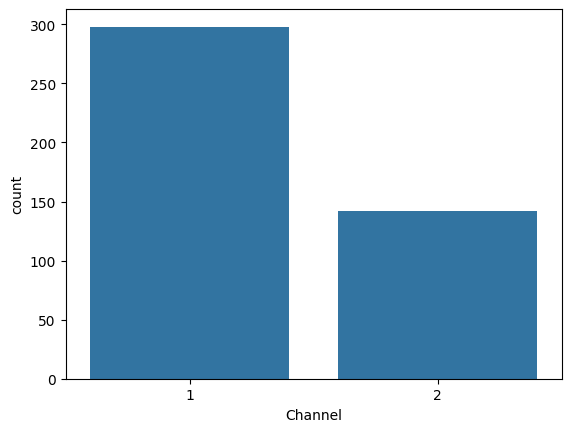

In [70]:
sns.countplot(x='Channel',data=df)
plt.show()


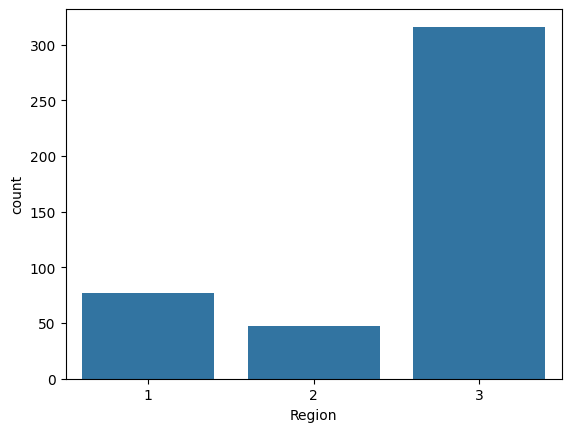

In [71]:
sns.countplot(x='Region',data=df)
plt.show()


<Axes: xlabel='Fresh', ylabel='Density'>

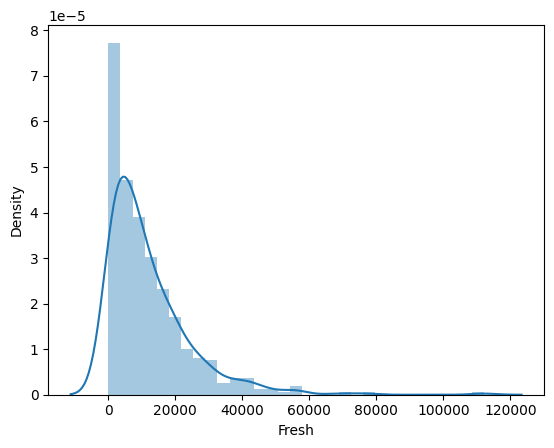

In [72]:
sns.distplot(df['Fresh'])

<Axes: xlabel='Milk', ylabel='Density'>

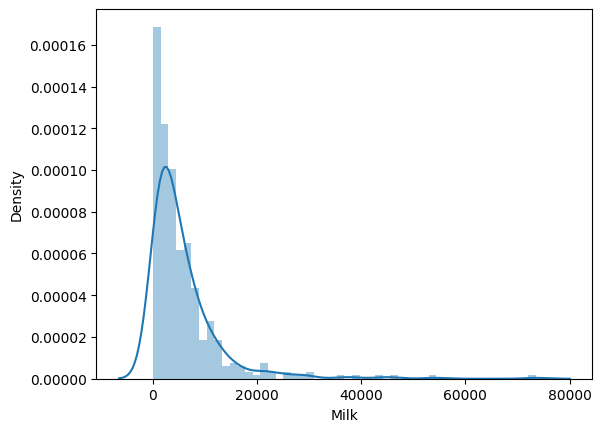

In [73]:
sns.distplot(df['Milk'])

In [74]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Grocery', ylabel='Density'>

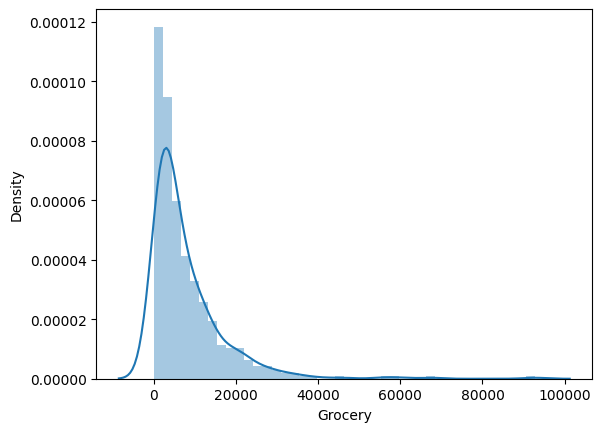

In [75]:
sns.distplot(df['Grocery'])

<Axes: xlabel='Frozen', ylabel='Density'>

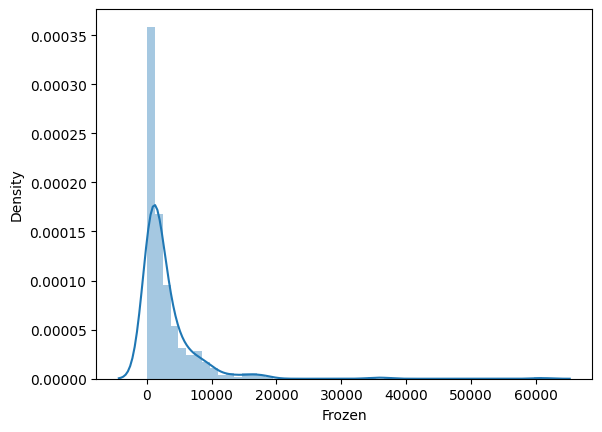

In [76]:
sns.distplot(df['Frozen'])

<Axes: xlabel='Detergents_Paper', ylabel='Density'>

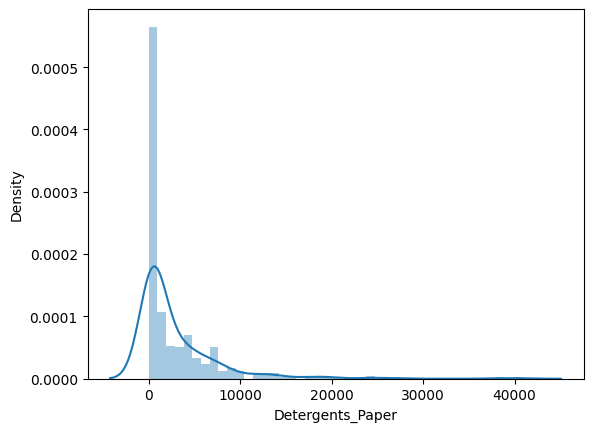

In [77]:
sns.distplot(df['Detergents_Paper'])

<Axes: xlabel='Delicassen', ylabel='Density'>

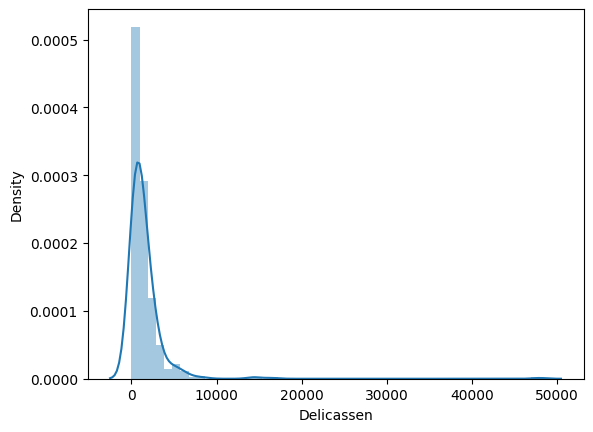

In [78]:
sns.distplot(df['Delicassen'])

In [79]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [80]:
df.tail(20)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
420,1,3,4456,5266,13227,25,6818,1393
421,2,3,17063,4847,9053,1031,3415,1784
422,1,3,26400,1377,4172,830,948,1218
423,2,3,17565,3686,4657,1059,1803,668
424,2,3,16980,2884,12232,874,3213,249
425,1,3,11243,2408,2593,15348,108,1886
426,1,3,13134,9347,14316,3141,5079,1894
427,1,3,31012,16687,5429,15082,439,1163
428,1,3,3047,5970,4910,2198,850,317
429,1,3,8607,1750,3580,47,84,2501


In [81]:
#DBSCAN is used for nonlinearity

In [82]:
#spotify or wynk this works on similarity  and shows recommendations to us

In [83]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [84]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.774272,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,1.000000,3.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,2.000000,3.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [86]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [87]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X = stscaler.fit_transform(df)

In [88]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [89]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


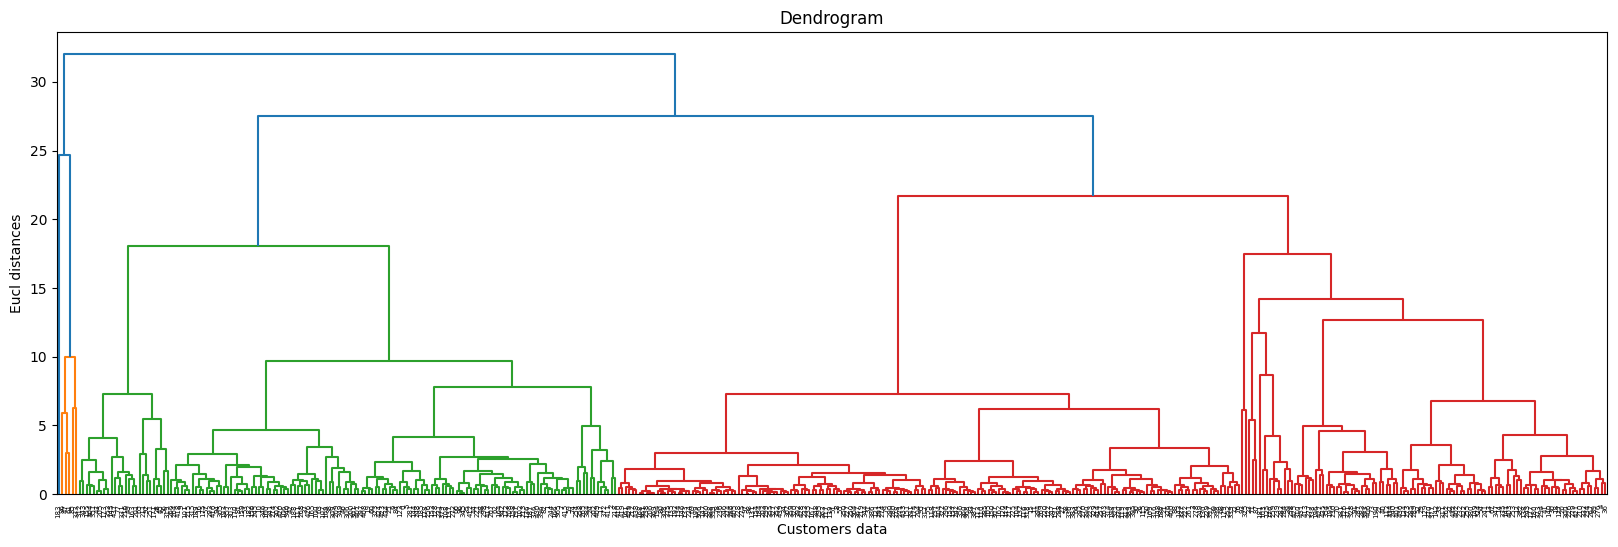

In [90]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 6))
dendo = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers data')
plt.ylabel('Eucl distances')
plt.show()

In [91]:
len(set(dendo['color_list']))-1


3

In [92]:
 from sklearn.cluster import AgglomerativeClustering

In [93]:
model = AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(X)

In [94]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [95]:
cluster.shape

(440,)

In [96]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [97]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [98]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [99]:
cust_group_data=pd.concat([df,group_num],axis=1)
cust_group_data


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,2
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,2
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,2
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,1
...,...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,1
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,1
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,2
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,1


In [100]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

In [101]:
#sklearn is an library in python

In [101]:
#silhouette=quantifies how well a data point fits into its assigned cluster and how distinct it is from other clusters

KMEANS

In [107]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [108]:
wcss

[2266.9552665832457,
 1644.0598512347558,
 1326.6746082135523,
 1070.2551995135611,
 989.3326418885056,
 856.7070228388113,
 791.8280762163159,
 710.194339406752,
 668.2225054846898]